In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
X[1]

array([-0.24882029, -0.73115232])

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

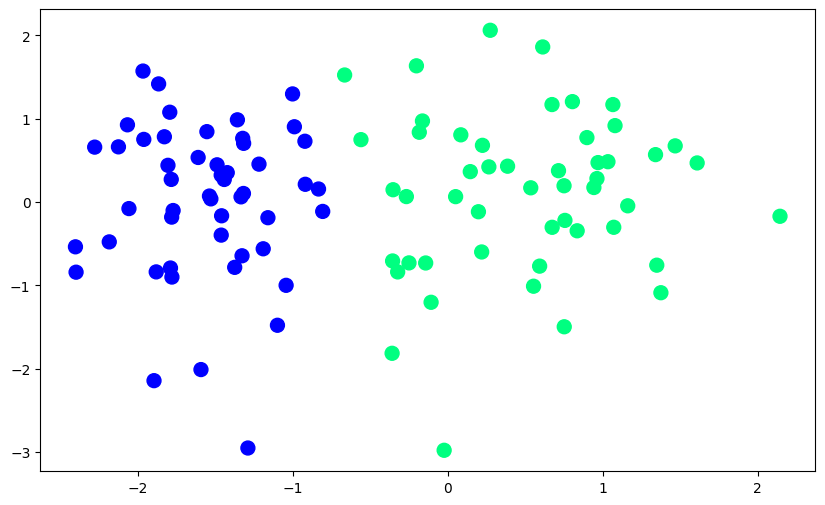

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
def perceptron(X,y):
    # insert function(in which array to insert , insert at which index , value to insert , insert along the column)
    # axis : if 0 then insert at row else at column i.e. new column is inserted
    # axis : if None then array is flatened in 1 single list
    X = np.insert(X,0,1,axis=1)
    # print("X: \n",X,"\n")
    
    '''
        X = np.array([[1, 2, 3], 
        [1, 4, 5]])
        # X.shape[1] will give you no. of columns in array
        # np.ones will generate array of 1s as of column length
        weights = np.ones(X.shape[1])
        print(weights) # output will be [1,1,1]
    '''
    weights = np.ones(X.shape[1])
    print("weights:\n ",weights, "\n")
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        '''
        # w = w +n(y-y^)x
        
        weights = [1,1,1]+(0.1)⋅(1-1)⋅[1,2,3] = [1,1,1]
        or
        weights = [1,1,1]+(0.1)⋅(1-0)⋅[1,2,3] = [1,1,1]+[0.1,0.2,0.3] = [1.1,1.2,1.3]
        '''
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    print("new weights ",weights)
    
    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

intercept_,coef_ = perceptron(X,y)


weights:
  [1. 1. 1.] 

new weights  [0.9        1.32187684 0.11530238]


In [7]:
print(intercept_)
print(coef_)

0.9
[1.32187684 0.11530238]


(-3.0, 2.0)

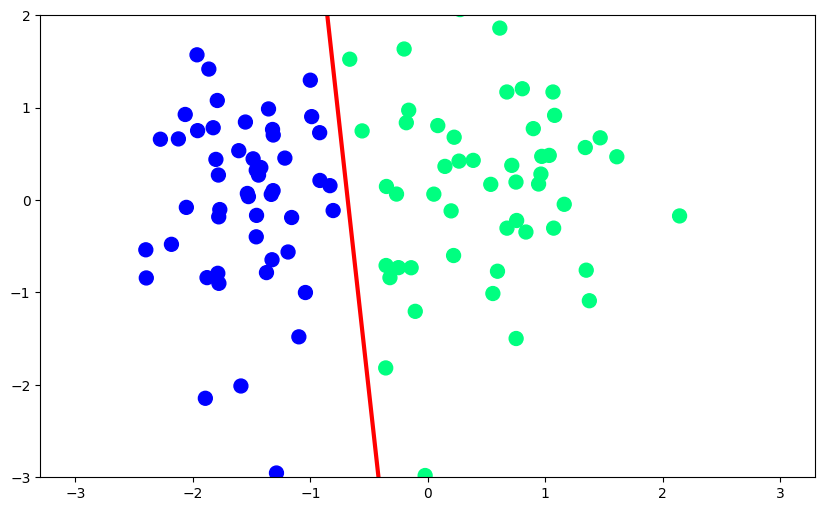

In [8]:
'''
w0 + w1.x1 + w2.x2 = 0
x2 = (-w0/w2) - (w1/w2).x1
following y = mx + b

we have 
m = -(w1/w2)
b = -(w0/w2)
'''
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
# np.linspace(-3, 3, 100) generates 100 equally spaced values between -3 and 3.
x_input = np.linspace(-3,3,100)
# draw the line
y_input = m*x_input + b

# draw figure outer space
plt.figure(figsize=(10,6))
# draw line
plt.plot(x_input,y_input,color='red',linewidth=3)
# draw scatter points
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# set the y-limits of the current axes
''' eg. if the parabola is restricted on the y-axis between -3 and 2, so only part of the parabola that 
falls within this range will be visible. '''
plt.ylim(-3,2)

In [9]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        # w = w +n(y-y^)x
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

m,b = perceptron(X,y)
# print("m",m,"\n")
# print("b",b)

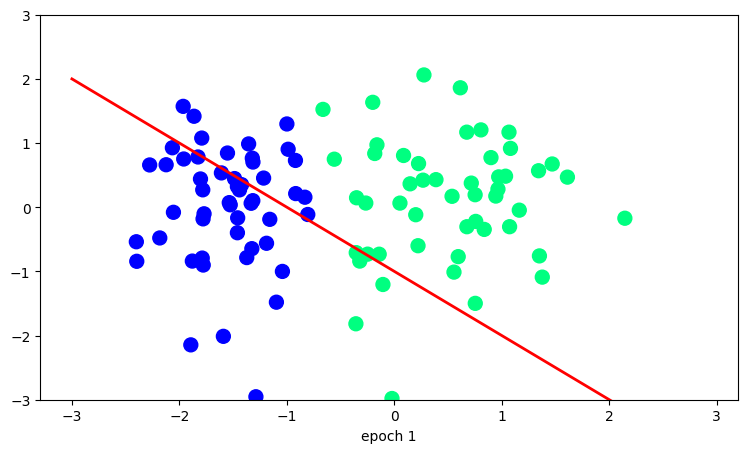

In [14]:
'''Kaggle notebooks often lack support for interactive matplotlib backends like notebook. Instead, they 
use static backends like inline, which don't render interactive animations directly in the notebook'''
# %matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

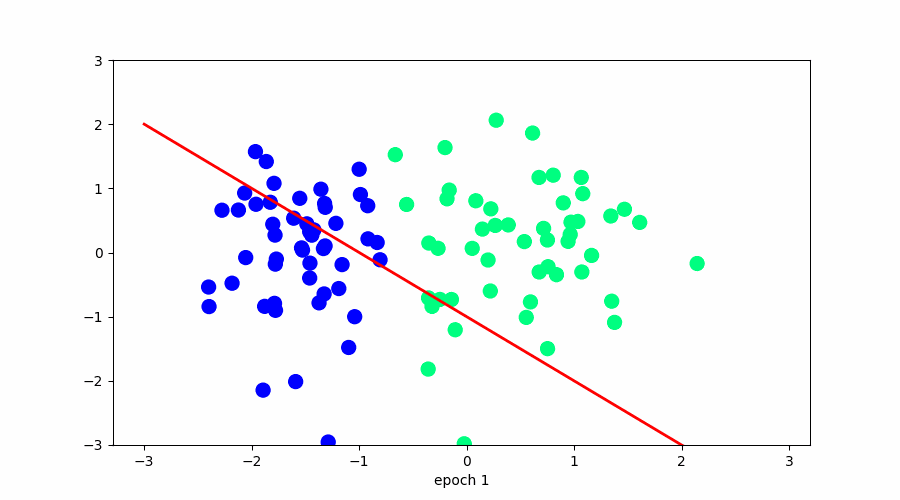

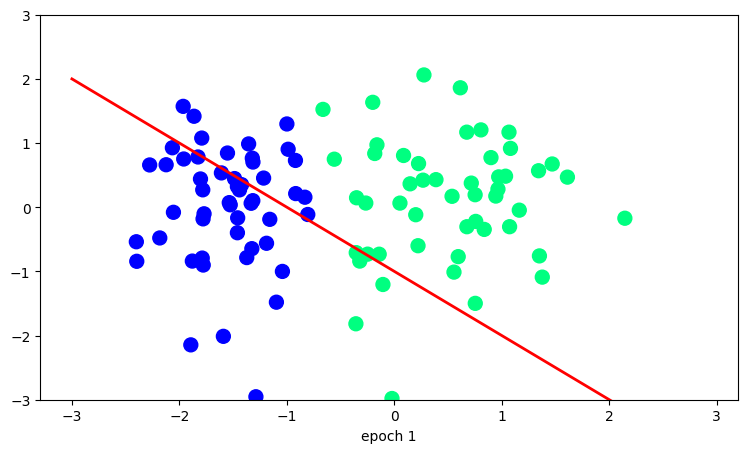

In [15]:
'''Kaggle notebooks often lack support for interactive matplotlib backends like notebook. Instead, they 
use static backends like inline, which don't render interactive animations directly in the notebook'''
# %matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

# Save the animation as a GIF
from matplotlib.animation import PillowWriter
anim.save('animation.gif', writer=PillowWriter(fps=10))

# Display the saved animation
from IPython.display import Image
Image(filename='animation.gif')

(-3.0, 2.0)

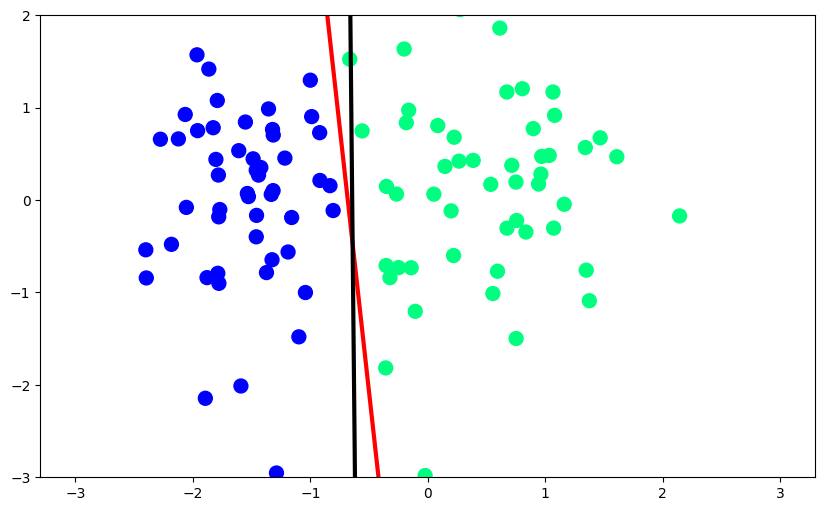

In [16]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)